# **Air Quality Monitoring System**

# Part B

# Exploring Dataset

In [0]:
import pandas
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
csv = "clustered_data.csv"
names = ["NO2 AQI","O3 AQI","SO2 AQI","CO AQI","cluster","principal_feature1","principal_feature2","anomaly21"]
dataframe = pandas.read_csv(csv, names=names)

# Preprocessing the dataset

In [0]:
dataframe

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,cluster,principal_feature1,principal_feature2,anomaly21
NaN,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,cluster,principal_feature1,principal_feature2,anomaly21
1.0,46.0,34.0,13.0,11.57636,4,1.4156891145169679,0.15579167588229675,0.0
3.0,46.0,34.0,8.879979203327467,11.57636,4,1.2826712505386286,0.031321023674698766,0.0
5.0,34.0,27.0,4.0,11.57636,3,0.9413791626392994,-0.590460119119891,0.0
7.0,34.0,27.0,8.879979203327467,11.57636,3,1.0989328357687138,-0.4430302336474162,0.0
9.0,48.0,14.0,16.0,11.57636,1,1.9220709989204396,-0.7079922797749464,0.0
10.0,48.0,14.0,16.0,28.0,1,0.5729620101132732,-0.728640173930314,0.0
11.0,48.0,14.0,8.879979203327467,11.57636,1,1.692195955906184,-0.923096444542558,0.0
12.0,48.0,14.0,8.879979203327467,28.0,1,1.5326094467458802,0.6229646560310903,0.0
13.0,72.0,28.0,23.0,11.57636,2,3.06072983152293,0.3574682491473826,0.0


In [0]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [0]:
data = dataframe.values

In [0]:
data

array([['NO2 AQI', 'O3 AQI', 'SO2 AQI', ..., 'principal_feature1',
        'principal_feature2', 'anomaly21'],
       ['46.0', '34.0', '13.0', ..., '1.4156891145169679',
        '0.15579167588229675', '0.0'],
       ['46.0', '34.0', '8.879979203327467', ..., '1.2826712505386286',
        '0.031321023674698766', '0.0'],
       ...,
       ['46.0', '31.0', '23.0', ..., '0.39099712488311783',
        '0.04909433713311601', '0.0'],
       ['46.0', '31.0', '8.879979203327467', ..., '-0.19346242509121692',
        '0.1506386343186379', '0.0'],
       ['46.0', '31.0', '8.879979203327467', ..., '1.5069980704628563',
        '1.249678500430572', '0.0']], dtype=object)

In [0]:
gases = data[1:,[0,1,2,3,4]]
gases

array([['46.0', '34.0', '13.0', '11.57636', '4'],
       ['46.0', '34.0', '8.879979203327467', '11.57636', '4'],
       ['34.0', '27.0', '4.0', '11.57636', '3'],
       ...,
       ['46.0', '31.0', '23.0', '3.0', '1'],
       ['46.0', '31.0', '8.879979203327467', '11.57636', '4'],
       ['46.0', '31.0', '8.879979203327467', '3.0', '4']], dtype=object)

In [0]:
dat = pd.DataFrame(gases)

In [0]:
dat

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI,cluster
0,46.0,34.0,13.000000,11.57636,4
1,46.0,34.0,8.879979,11.57636,4
2,34.0,27.0,4.000000,11.57636,3
3,34.0,27.0,8.879979,11.57636,3
4,48.0,14.0,16.000000,11.57636,1
5,48.0,14.0,16.000000,28.00000,1
6,48.0,14.0,8.879979,11.57636,1
7,48.0,14.0,8.879979,28.00000,1
8,72.0,28.0,23.000000,11.57636,2
9,72.0,28.0,23.000000,34.00000,2


In [0]:
dat.columns = ["NO2 AQI","O3 AQI","SO2 AQI","CO AQI","cluster"]

In [0]:
numeric = ["NO2 AQI","O3 AQI","SO2 AQI","CO AQI"]

In [0]:
dat[numeric] = dat[numeric].apply(pd.to_numeric, errors='coerce')

In [0]:
dat['cluster'].unique()

array(['4', '3', '1', '2', '0', '5'], dtype=object)

# Splitting Training and Test Set

In [0]:
array = dat.values
# separate array into input and output components
X = array[0:36742,0:4]
Y = array[0:36742,-1]
Y=Y.astype('int')

In [0]:
X

array([[46.0, 34.0, 13.0, 11.576360000000001],
       [46.0, 34.0, 8.879979203327466, 11.576360000000001],
       [34.0, 27.0, 4.0, 11.576360000000001],
       ...,
       [46.0, 31.0, 23.0, 3.0],
       [46.0, 31.0, 8.879979203327466, 11.576360000000001],
       [46.0, 31.0, 8.879979203327466, 3.0]], dtype=object)

In [0]:
Y

array([4, 4, 3, ..., 1, 4, 4])

In [0]:
from sklearn.cross_validation import train_test_split
#Splitting the dataset into train and test sets with 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Applying Classification Algorithms

In [0]:
#Importing libraries
import numpy as np
from numpy import genfromtxt
import pandas as pd

import urllib

import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import math

In [0]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
#cm
#print ("Accuracy of DT = {} %".format(accuracy_score(y_result,y_pred)*100))
#print ("Classification Report of DT \n {}".format(classification_report(y_test, y_pred, labels=range(0,2))))

Accuracy of DT = 96.0 %
Classification Report of DT 
              precision    recall  f1-score   support

          0       0.99      0.98      0.98      3293
          1       0.95      0.91      0.93      1620
          2       0.95      0.91      0.93       250
          3       0.96      0.97      0.97      3227
          4       0.93      0.97      0.95      2078
          5       1.00      0.98      0.99       555

avg / total       0.96      0.96      0.96     11023



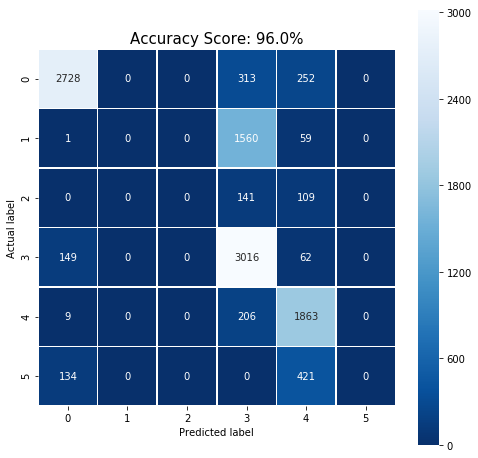

In [0]:
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=7)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_result=y_test
print ("Accuracy of DT = {} %".format(round(accuracy_score(y_result,y_pred)*100),2))
print ("Classification Report of DT \n {}".format(classification_report(y_test, y_pred, labels=range(0,6))))
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(accuracy_score(y_result,y_pred)*100),2)
plt.title(all_sample_title, size = 15);

Accuracy of SVM = 99.85848029610277 %
Classification Report of SVM 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      2821
          1       1.00      1.00      1.00      1309
          2       1.00      1.00      1.00       204
          3       1.00      1.00      1.00      2675
          4       1.00      1.00      1.00      1721
          5       1.00      1.00      1.00       456

avg / total       1.00      1.00      1.00      9186



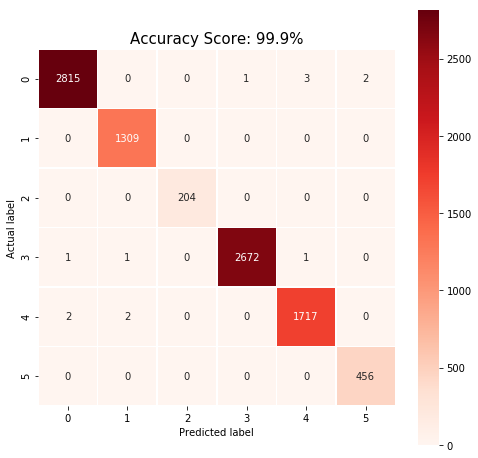

In [0]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
 
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
y_result=y_test
print ("Accuracy of SVM = {} %".format(accuracy*100))
print ("Classification Report of SVM \n {}".format(classification_report(y_test, svm_predictions, labels=range(0,6))))
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(accuracy*100,1))
plt.title(all_sample_title, size = 15);

0.9823644676681907
Accuracy of KNN = 98.23644676681907 %
Classification Report of KNN
              precision    recall  f1-score   support

          0       0.99      0.99      0.99      2821
          1       0.96      0.98      0.97      1309
          2       0.98      0.95      0.96       204
          3       0.99      0.98      0.98      2675
          4       0.98      0.98      0.98      1721
          5       0.99      0.98      0.99       456

avg / total       0.98      0.98      0.98      9186



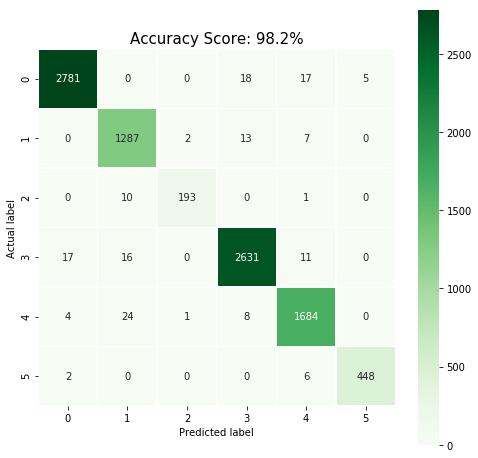

In [0]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
 
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

print ("Accuracy of KNN = {} %".format(accuracy*100))
print ("Classification Report of KNN\n {}".format(classification_report(y_test, knn_predictions, labels=range(0,6))))
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(accuracy*100,1))
plt.title(all_sample_title, size = 15);

0.8976703679512301
Accuracy of NB = 89.767036795123 %
Classification Report of NB
              precision    recall  f1-score   support

          0       0.95      0.96      0.95      2821
          1       0.88      0.70      0.78      1309
          2       0.91      0.93      0.92       204
          3       0.86      0.92      0.89      2675
          4       0.89      0.88      0.88      1721
          5       0.90      1.00      0.95       456

avg / total       0.90      0.90      0.90      9186



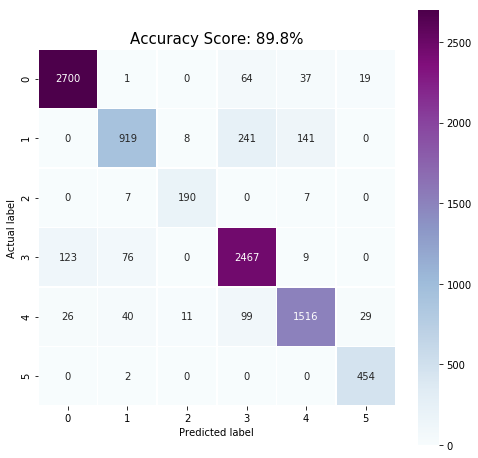

In [0]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
 
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

print ("Accuracy of NB = {} %".format(accuracy*100))
print ("Classification Report of NB\n {}".format(classification_report(y_test, gnb_predictions, labels=range(0,6))))
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(accuracy*100,1))
plt.title(all_sample_title, size = 15);

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [0]:
#Splitting the dataset into train and test sets with 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [0]:
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [0]:
predictions = mlp.predict(x_test)

Accuracy of MLP = 97.69572711603011 %
Classification Report of MLP 
              precision    recall  f1-score   support

          0       1.00      0.98      0.99      3293
          1       0.98      0.97      0.97      1620
          2       0.92      0.96      0.94       250
          3       0.99      0.97      0.98      3227
          4       0.93      0.99      0.96      2078
          5       0.98      0.99      0.98       555

avg / total       0.98      0.98      0.98     11023



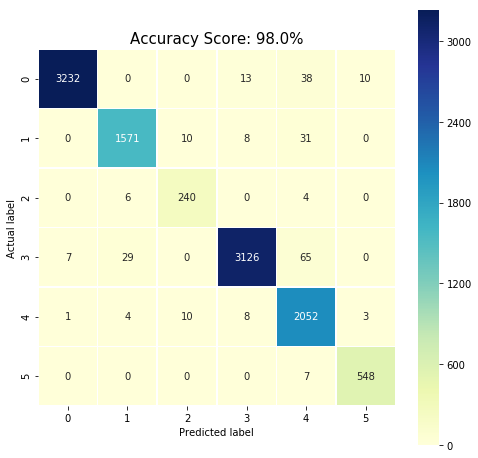

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,predictions)
#print(cm)
print ("Accuracy of MLP = {} %".format(accuracy_score(y_test,predictions)*100))
print ("Classification Report of MLP \n {}".format(classification_report(y_test, predictions, labels=range(0,6))))
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}%'.format(round(accuracy_score(y_test,predictions)*100),1)
plt.title(all_sample_title, size = 15);

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

In [0]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)


In [0]:
import numpy as np
print('Mean Absolute Error:', round(np.mean(errors), 5), 'degrees.')

Mean Absolute Error: 0.28309 degrees.
